## Imports

In [28]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import scipy
from kernels import K_classical, K_simple_RX, K_phi_RX, K_layered, K_L_tower, K_L_cheb
from util import quantum_dataset, plot_results
from itertools import product

In [29]:
from optim import mmr, multivalued_mmr_DE, SVR_fit

## Kernel

### Visualize Kernel

In [33]:
def kernel_subplot(ax, k, N, grid_res=15):
    xs = np.linspace(0, 2*np.pi, grid_res)
    KK = np.array([[k(x, y) for x in xs] for y in tqdm(xs)])

    #ax.set_title(rf"$\kappa(x, y)$ for $N={N}$ qubits")
    ax.imshow(KK, extent=(0, 2*np.pi, 0, 2*np.pi), cmap="twilight")
    #ax.set_xlabel("x")
    #ax.set_ylabel("y")
    ax.set_xticks([0, np.pi, 2*np.pi], ["0", r"$\pi$", r"$2\pi$"])
    ax.set_yticks([0, np.pi, 2*np.pi], ["0", r"$\pi$", r"$2\pi$"])
    
def loss_plot(lossesArray, labels=None):
    for i, losses in enumerate(lossesArray):
        label = labels[i] if labels is not None else f"loss {i}"
        plt.plot(losses, label=label)
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.yscale("log")
    plt.legend()
    plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

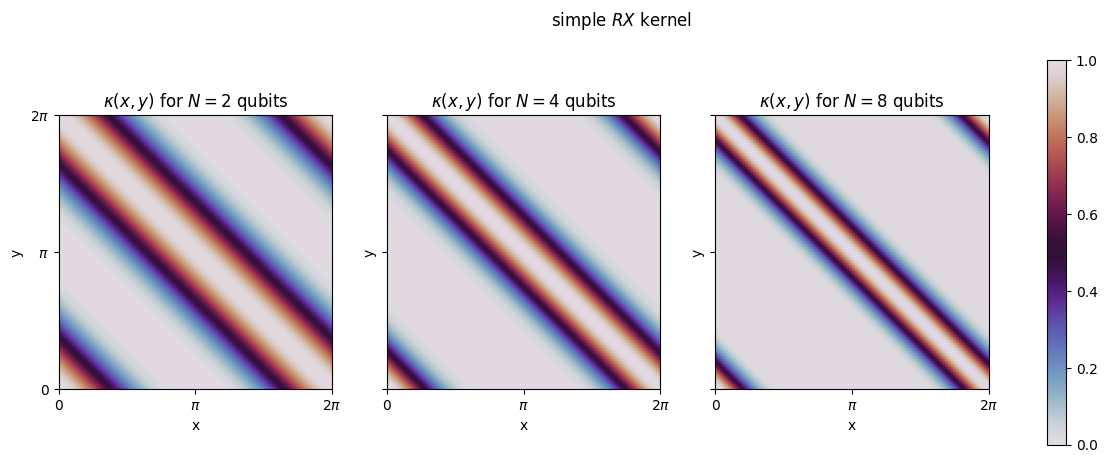

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
fig.suptitle(r"simple $RX$ kernel")
kernel_subplot(axs[0], K_simple_RX(2), 2)
kernel_subplot(axs[1], K_simple_RX(4), 4)
kernel_subplot(axs[2], K_simple_RX(8), 8)
# colorbar
fig.colorbar(axs[2].images[0], ax=axs, orientation="vertical")
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

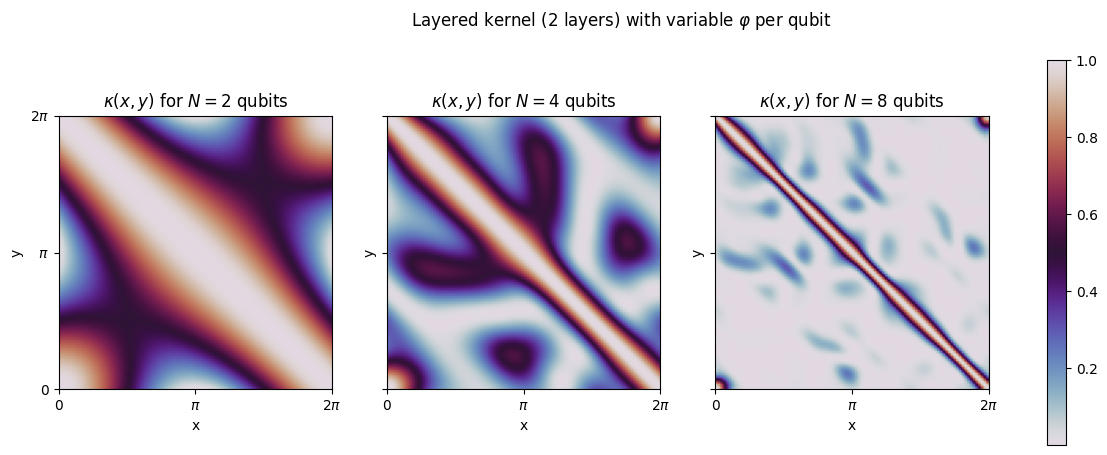

In [23]:
n_layers = 2
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
fig.suptitle(fr"Layered kernel ({n_layers} layers) with variable $\varphi$ per qubit")
kernel_subplot(axs[0], K_layered(2, n_layers=n_layers), 2)
kernel_subplot(axs[1], K_layered(4, n_layers=n_layers), 4)
kernel_subplot(axs[2], K_layered(8, n_layers=n_layers), 8)
# colorbar
fig.colorbar(axs[2].images[0], ax=axs, orientation="vertical")
plt.show()

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

AttributeError: 'numpy.ndarray' object has no attribute 'images'

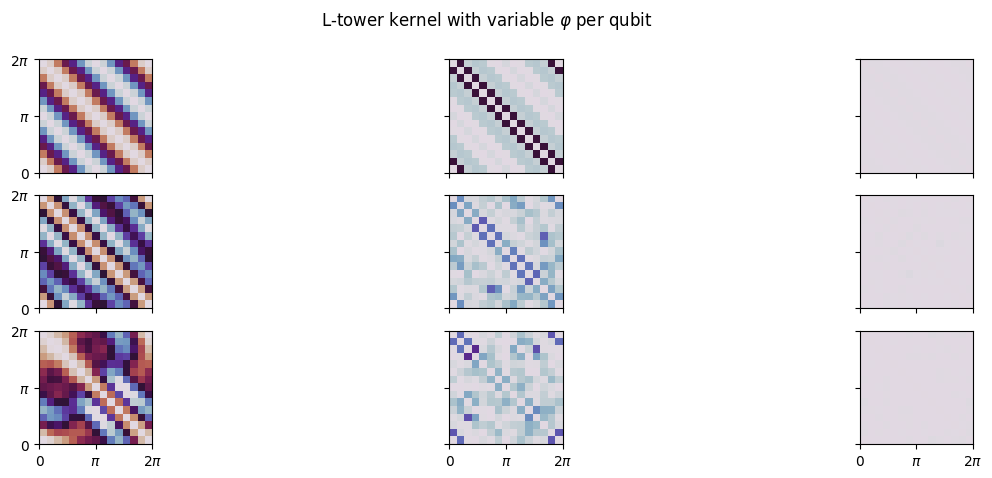

In [35]:
n_layers = 2
fig, axs = plt.subplots(3, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=False)
fig.suptitle(fr"L-tower kernel with variable $\varphi$ per qubit")
kernel_subplot(axs[0][0], K_L_tower(2, n_layers=1), 2)
kernel_subplot(axs[0][1], K_L_tower(4, n_layers=1), 4)
kernel_subplot(axs[0][2], K_L_tower(8, n_layers=1), 8)
kernel_subplot(axs[1][0], K_L_tower(2, n_layers=2), 2)
kernel_subplot(axs[1][1], K_L_tower(4, n_layers=2), 4)
kernel_subplot(axs[1][2], K_L_tower(8, n_layers=2), 8)
kernel_subplot(axs[2][0], K_L_tower(2, n_layers=3), 2)
kernel_subplot(axs[2][1], K_L_tower(4, n_layers=3), 4)
kernel_subplot(axs[2][2], K_L_tower(8, n_layers=3), 8)
# colorbar
fig.colorbar(axs[2].images[0], ax=axs, orientation="vertical")
plt.show()

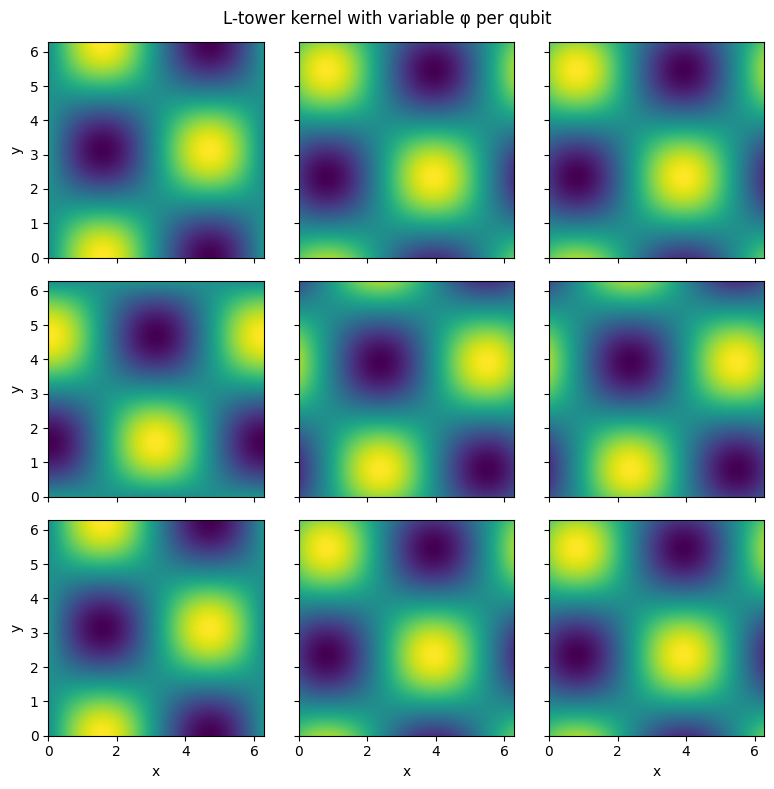

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Dummy data for the plots
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, 2*np.pi, 100)
X, Y = np.meshgrid(x, y)
Z1 = np.sin(X) * np.cos(Y)
Z2 = np.sin(X + np.pi/4) * np.cos(Y + np.pi/4)
Z3 = np.sin(X + np.pi/2) * np.cos(Y + np.pi/2)
Z4 = np.sin(X + 3*np.pi/4) * np.cos(Y + 3*np.pi/4)
Z5 = np.sin(X + np.pi) * np.cos(Y + np.pi)
Z6 = np.sin(X + 5*np.pi/4) * np.cos(Y + 5*np.pi/4)

fig, axs = plt.subplots(3, 3, figsize=(8, 8), tight_layout=True, sharex=True, sharey=True)
fig.suptitle('L-tower kernel with variable φ per qubit')

# Adjust spacing
#plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Plotting the data
axs[0, 0].imshow(Z1, extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower')
axs[0, 1].imshow(Z2, extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower')
axs[0, 2].imshow(Z2, extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower')
axs[1, 0].imshow(Z3, extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower')
axs[1, 1].imshow(Z4, extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower')
axs[1, 2].imshow(Z4, extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower')
axs[2, 0].imshow(Z5, extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower')
axs[2, 1].imshow(Z6, extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower')
axs[2, 2].imshow(Z6, extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower')

# Setting the labels on outer plots
for i in range(3):
    axs[2, i].set_xlabel('x')
    axs[i, 0].set_ylabel('y')

plt.show()


## Results

### $f(x) = x^2$

In [29]:
x = np.linspace(0, 0.1, 51)
y = x**2
data = np.array([x, y])

In [30]:
k = K_classical(0.14)
f,_ = mmr(X=x, Y=x, F=y, K=k)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 15
         Hessian evaluations: 0


In [31]:
k = K_layered(8, n_layers=5)
f_q,_ = mmr(X=x, Y=x, F=y, K=k)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 161
         Hessian evaluations: 0


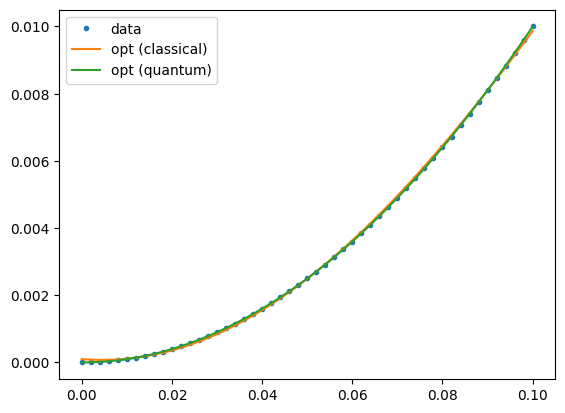

In [32]:
plt.plot(x, y, ".", label="data")
plt.plot(x, [f(x) for x in x], label="opt (classical)")
plt.plot(x, [f_q(x) for x in x], label="opt (quantum)")
plt.legend()
plt.show()

### Honeycomb magnetization dataset

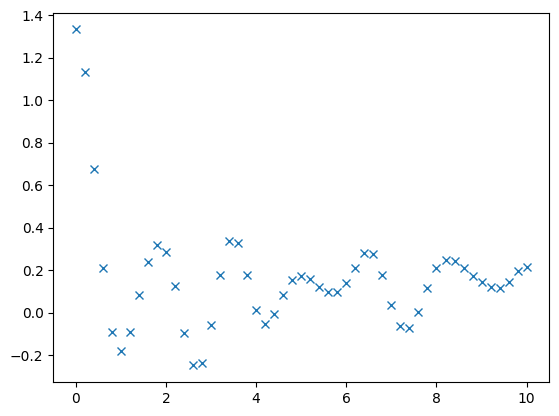

In [17]:
data = quantum_dataset()
x = data[:, 0]
y = data[:, 1] * 8
data = np.array([x, y])
plt.plot(x, y, 'x')

In [87]:
k = K_classical(0.20)
f, losses_classical = mmr(X=x, Y=x, F=y, K=k)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 2043
         Hessian evaluations: 0


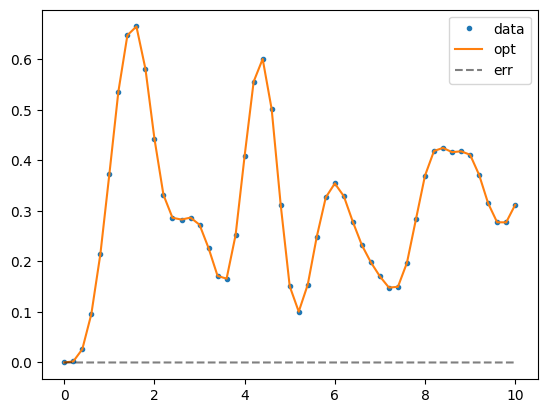

In [94]:
mmr_classical_predict = np.array([f(x) for x in x])

plt.plot(x, y, ".", label="data")
plt.plot(x, mmr_classical_predict, label="opt")
plt.plot(x, mmr_classical_predict - y, "--", label="err", alpha=0.5, color="black")
plt.legend()
plt.show()

Text(0, 0.5, 'Loss')

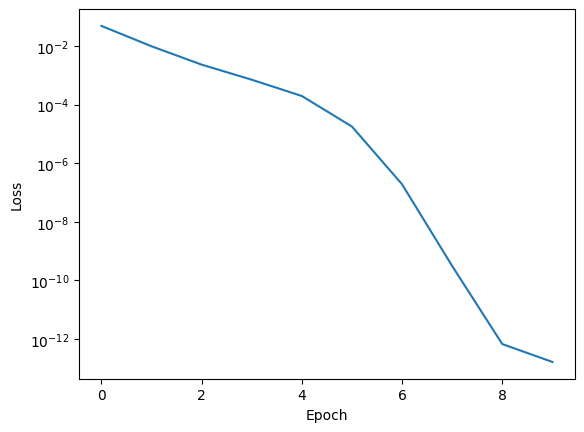

In [95]:
plt.plot(losses_classical)
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [90]:
k = K_layered(8, n_layers=5)
f_q, losses_quantum = mmr(X=x, Y=x, F=y, K=k)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 63
         Hessian evaluations: 0


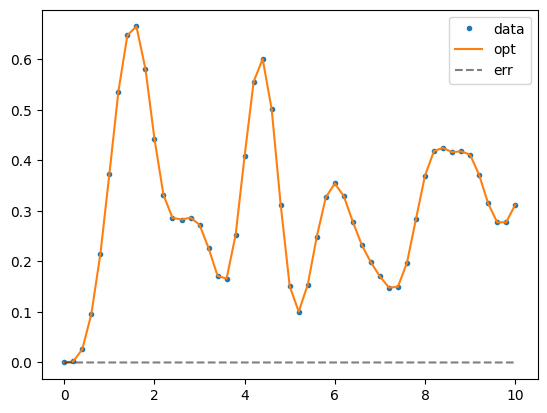

In [96]:
mmr_quantum_predict = np.array([f_q(x) for x in x])

plt.plot(x, y, ".", label="data")
plt.plot(x, mmr_quantum_predict, label="opt")
plt.plot(x, mmr_quantum_predict - y, "--", label="err", alpha=0.5, color="black")
plt.legend()
plt.show()

In [18]:
kernel_classical = K_classical(0.2)
kernel_quantum = K_L_tower(N=8, n_layers=2)

x_input = x.reshape(-1, 1)
y_input = y

svr_classic = SVR_fit(X=x_input, Y=y_input, K=kernel_classical, params= {'C': 1, 'epsilon': 0.001, 'gamma': 0.1})
svr_classic_predictions = svr_classic.predict(x_input)

x_input = (x / np.max(x) * np.pi * 2 * 0.75).reshape(-1, 1)
svr_quantum = SVR_fit(X=x_input, Y=y_input, K=kernel_quantum)#, params={'C': 1, 'epsilon': 0.1, 'gamma': 0.1} )

svr_quantum_predictions = svr_quantum.predict(x_input)

[LibSVM]*.*
optimization finished, #iter = 188
obj = -1.042979, rho = -0.180373
nSV = 48, nBSV = 1
Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

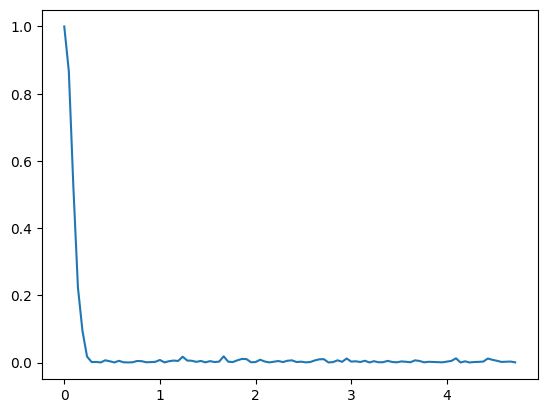

In [10]:
from kernels import K_L_tower
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, np.pi * 2 * 0.75, 100)

plt.plot(x, [K_L_tower(N=8, n_layers=2)(x, 0) for x in x])
plt.show()

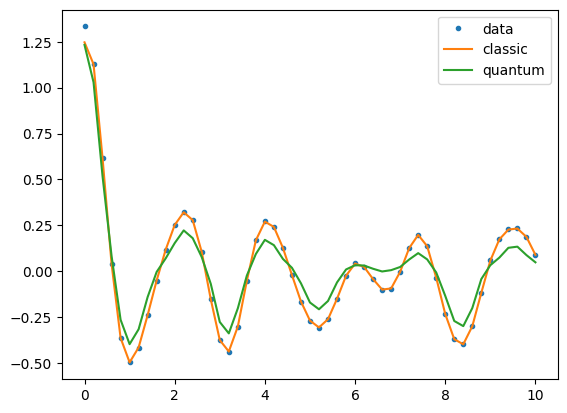

In [9]:
plt.plot(x, y, ".", label="data")
plt.plot(x, svr_classic_predictions, label="classic")
plt.plot(x, svr_quantum_predictions, label="quantum")
plt.legend()
plt.show()

### $\frac{df}{dx} = -\lambda \kappa f - \lambda \exp(\lambda \kappa x)\sin(\lambda x)$

with Solution: $f_{sol}(x) = -\lambda \exp(-\lambda \kappa x)\cos(\lambda x)$

In [15]:
def make_DE(llambda, kk):
    def df_dx(x, f, l, k):
        return -l * k * f -l * np.exp(-l * k * x) * np.sin(l * x)
    
    def DE(x, f, dfdx):
        return dfdx - df_dx(x, f, llambda, kk)
    
    def f_sol(x):
        return np.exp(-llambda * kk * x) * np.cos(llambda * x)
    
    return DE, f_sol

llambda = 20
kk = 0.1

DE, sol = make_DE(llambda, kk)

In [18]:
x = np.linspace(0, 1, 21).reshape(21, 1)
y = x

k = K_layered(8, n_layers=5)
f_m = multivalued_mmr_DE(DE, [x, y], np.array([0.]), np.array([1.]), k)

Optimization terminated successfully.
         Current function value: 0.003305
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 1406
         Hessian evaluations: 0


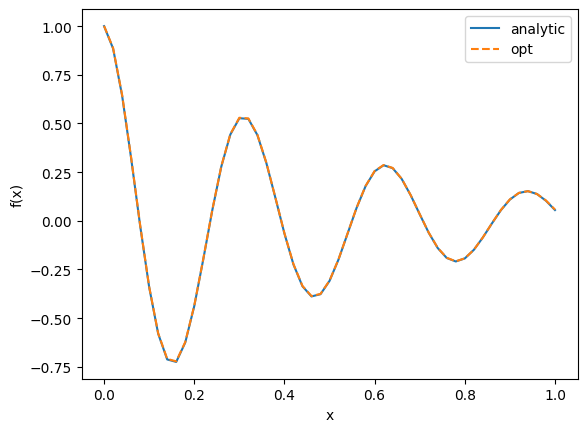

In [19]:
x = np.linspace(0, 1, 51)
y = x
xs = np.reshape(x, (len(x), -1))
plt.plot(xs, [sol(x) for x in xs], label="analytic")
plt.plot(xs, [f_m(x) for x in xs], label="opt", linestyle="--")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend()
plt.show()

- reproduce regression figure (Fig 1)

- mmmr de linear/nonlinear with noise with varying k

### Duffing equation

In [20]:
a = 0.5
b = 0.15
c = 3
e = 3 * np.pi

def make_duffing_DE():
    def d2f_d2x(x, f):
        return c*np.cos(e*x) - a * f - b * f**3
    
    def DE(x, f, dfdx):
        return np.array([f[1]-dfdx[0], dfdx[1]-d2f_d2x(x[0], f[0])])
    
    return DE

In [21]:
DE = make_duffing_DE()
x = np.linspace(0, 1, 21).reshape(21, 1)
y = np.array([[x], [x]]).reshape((len(x), 2))

In [22]:
k = K_layered(5, n_layers=2)
f_m = multivalued_mmr_DE(DE, [x, y], np.array([0.]), np.array([1., 1.]), k, IC_weight=10)


def d2f_d2x(x, f):
    return c * np.cos(e * x) - a * f - b * f ** 3

def dfdx(f, x):
    return np.array([f[1], d2f_d2x(x, f[0])])

f_sol = scipy.integrate.odeint(dfdx, np.array([1., 1.]), np.linspace(0, 1, 51))
f_qk = [f_m(x)[0] for x in xs]

Optimization terminated successfully.
         Current function value: 0.008294
         Iterations: 20
         Function evaluations: 46
         Gradient evaluations: 1942
         Hessian evaluations: 0


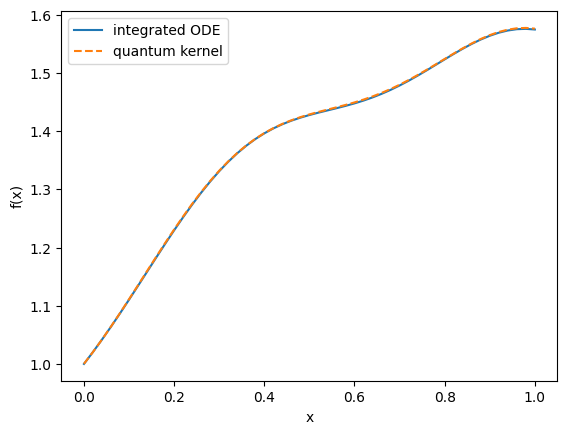

In [23]:
x = np.linspace(0, 1, 51)
y = x
xs = np.reshape(x, (len(x), -1))
plt.plot(xs, f_sol[:, 0], label="integrated ODE")
plt.plot(xs, f_qk, label="quantum kernel", linestyle="--")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend()
plt.show()